In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/normie/normie.csv
/kaggle/input/dark-patterns-on-ecommerce-platforms/dark_patterns.csv


In [2]:
df = pd.read_csv("/kaggle/input/normie/normie.csv")
df

,Pattern String,classification
0,FREE SHIPPING ON ORDERS OVER $100!,0.0
1,SOME EXCLUSIONS APPLY - LEARN MORE,0.0
2,HAVE A QUESTION? - CONTACT US,0.0
3,WELCOME TO 034MOTORSPORT!,0.0
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,0.0
...,...,...
2695,$5 Off Your Next Order,1.0
2696,©-2019 Barnaby Ltd dba Good Vibrations,0.0
2697,NaN,0.0
2698,18 U.S.C. §2257 Recordkeeping Requirements Com...,0.0


In [3]:
df = df.rename(columns={'classification': 'Label'})
df = df.rename(columns={'Pattern String': 'Pattern'})
df

,Pattern,Label
0,FREE SHIPPING ON ORDERS OVER $100!,0.0
1,SOME EXCLUSIONS APPLY - LEARN MORE,0.0
2,HAVE A QUESTION? - CONTACT US,0.0
3,WELCOME TO 034MOTORSPORT!,0.0
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,0.0
...,...,...
2695,$5 Off Your Next Order,1.0
2696,©-2019 Barnaby Ltd dba Good Vibrations,0.0
2697,NaN,0.0
2698,18 U.S.C. §2257 Recordkeeping Requirements Com...,0.0


<Axes: xlabel='Label', ylabel='count'>

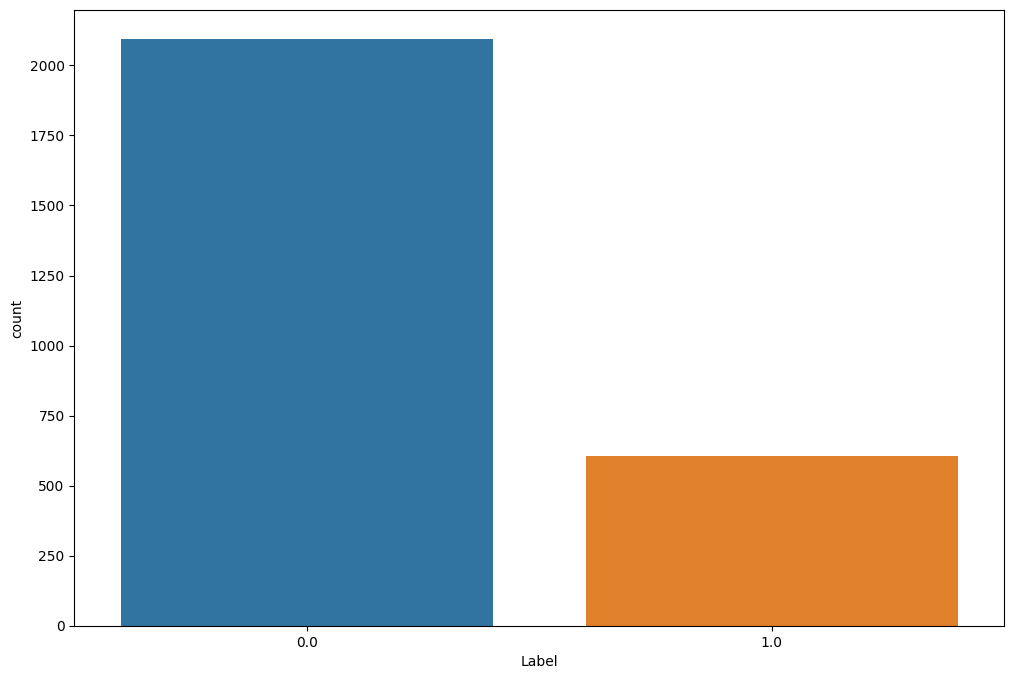

In [4]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Label'], data = df)

In [5]:
df.dropna(inplace = True)
df

,Pattern,Label
0,FREE SHIPPING ON ORDERS OVER $100!,0.0
1,SOME EXCLUSIONS APPLY - LEARN MORE,0.0
2,HAVE A QUESTION? - CONTACT US,0.0
3,WELCOME TO 034MOTORSPORT!,0.0
4,SHOP AUDISHOP VOLKSWAGENPERFORMANCE SOFTWARE03...,0.0
...,...,...
2694,Join Our List Get,0.0
2695,$5 Off Your Next Order,1.0
2696,©-2019 Barnaby Ltd dba Good Vibrations,0.0
2698,18 U.S.C. §2257 Recordkeeping Requirements Com...,0.0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(df['Pattern'], df['Label'], test_size = 0.3, random_state = 0)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
RFC =  RandomForestClassifier()
RFC.fit(X_train_vectorized, Y_train)
y_pred = RFC.predict(X_test_vectorized)

In [9]:
from sklearn.metrics import accuracy_score
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.875


In [10]:
from sklearn.metrics import classification_report
print(f'Classification Report: {classification_report(y_test, y_pred)}')

Classification Report:               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       571
         1.0       0.81      0.55      0.65       157

    accuracy                           0.88       728
   macro avg       0.85      0.76      0.79       728
weighted avg       0.87      0.88      0.87       728



In [11]:
from joblib import dump
dump(RFC, 'presence_classifer.joblib')
dump(vectorizer, 'presence_vectorizer.joblib')

['presence_vectorizer.joblib']